In [1]:
from catboost import CatBoostClassifier

from sklearn.metrics import confusion_matrix, classification_report, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from scipy.stats import chi2_contingency

from pipelines import pipe, pipe2, extra_features

In [6]:
train = pd.read_csv('~/desktop/expenditure/flaskapp/Datasets/train.csv')

<IPython.core.display.Javascript object>

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\User/desktop/expenditure/flaskapp/Datasets/train.csv'

In [3]:
#cat_cols = ['country', 'travel_with', 'main_activity', 'dominant_gender']
#train = extra_features(train, cat_cols)
X = train.drop(['Tour_ID', 'cost_category'], axis=1)
y = train['cost_category']

In [4]:
for cat in X.select_dtypes('object', 'category'):
    X.loc[:, cat] = X.loc[:, cat].fillna("None").astype(str)

In [5]:
for num in X.select_dtypes(np.number):
    X.loc[:, num] = X.loc[:, num].fillna(method='ffill')

<IPython.core.display.Javascript object>

In [6]:
col_drop=[]

for col in X.columns:
    ct=pd.crosstab(y, X[col])
    chi2, p, _, _ = chi2_contingency(ct)
    
    if p >= 0.05:
        col_drop.append(col)    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
col_drop

[]

In [8]:
X.drop(columns=col_drop, inplace=True)
X = pipe2(X)

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
len(le.classes_)

6

In [10]:
le.classes_

array(['High Cost', 'Higher Cost', 'Highest Cost', 'Low Cost',
       'Lower Cost', 'Normal Cost'], dtype=object)

In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, stratify=y, random_state=42) 

In [12]:
cat_cols = [col for col in train.select_dtypes('object', 'category')]

In [13]:
model = CatBoostClassifier(iterations=800,
                        max_depth=7,
                        learning_rate=0.1,
                        logging_level='Silent')#, cat_features=cat_cols,
                        

In [14]:
scores = cross_val_score(model,
                         X_train, y_train,
                         cv=10,
                         scoring='roc_auc_ovr')


print("ROC AUC: %.3f (+/- %.3f)" % (scores.mean(), 
                                    scores.std()))


ROC AUC: 0.844 (+/- 0.005)


In [15]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test, prediction_type='Class')

In [16]:
print(classification_report(y_pred, y_test, zero_division=True, target_names=le.classes_))

              precision    recall  f1-score   support

   High Cost       0.40      0.49      0.44       907
 Higher Cost       0.76      0.64      0.69      1727
Highest Cost       0.06      0.37      0.11        19
    Low Cost       0.07      0.35      0.12        98
  Lower Cost       0.60      0.59      0.60       786
 Normal Cost       0.67      0.55      0.60      2015

    accuracy                           0.57      5552
   macro avg       0.43      0.50      0.43      5552
weighted avg       0.63      0.57      0.59      5552



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

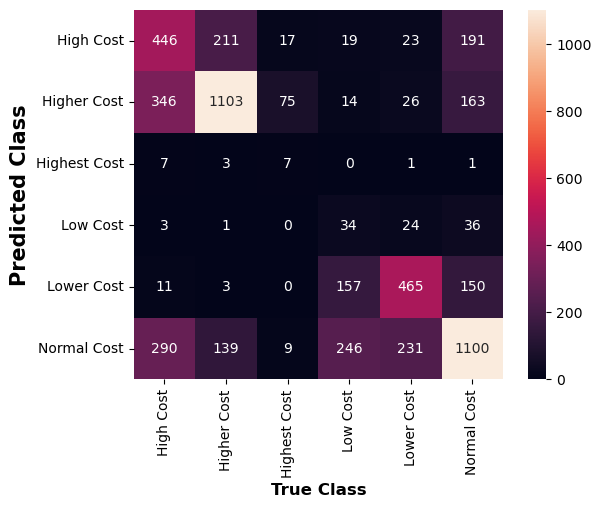

In [17]:
ct = confusion_matrix(y_pred, y_test)

sns.heatmap(ct, square=True, annot=True, fmt='g',
           xticklabels=le.classes_,
           yticklabels=le.classes_)

plt.xlabel("True Class", weight='bold', size=12)
plt.ylabel("Predicted Class", weight='bold', size=15)

plt.show();

In [18]:
pred = model.predict_proba(X_test)
print(roc_auc_score(y_test, pred, multi_class='ovr'))

0.8408783254391076


In [19]:
model.score(X_test, y_test)

0.5682636887608069

In [20]:
test = pd.read_csv("../Datasets/test.csv")
test.drop(['Tour_ID'], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [21]:
d = pipe2(test)

In [22]:
d[:, ::20]

array([[-0.44776931, -0.07553742, -0.02547202, ..., -0.04029442,
        -0.0284809 , -0.02205763],
       [ 0.78870735, -0.07553742, -0.02547202, ..., -0.04029442,
        -0.0284809 , -0.02205763],
       [-0.44776931, -0.07553742, -0.02547202, ..., -0.04029442,
        -0.0284809 , -0.02205763],
       ...,
       [-0.44776931, -0.07553742, -0.02547202, ..., -0.04029442,
        -0.0284809 , -0.02205763],
       [-1.68424596, -0.07553742, -0.02547202, ..., -0.04029442,
        -0.0284809 , -0.02205763],
       [ 0.78870735, -0.07553742, -0.02547202, ..., -0.04029442,
        -0.0284809 , -0.02205763]])

In [23]:
le.classes_

array(['High Cost', 'Higher Cost', 'Highest Cost', 'Low Cost',
       'Lower Cost', 'Normal Cost'], dtype=object)

In [24]:
le.classes_[model.predict(d[ ::20])[0]]

CatBoostError: C:/Program Files (x86)/Go Agent/pipelines/BuildMaster/catboost.git/catboost/libs/data/model_dataset_compatibility.cpp:72: Feature 134 is present in model but not in pool.

In [25]:
(model.predict_proba(d[:, 20])).round(2)

array([0.19, 0.06, 0.  , 0.03, 0.06, 0.66])

In [104]:
np.array(d[::1])

<IPython.core.display.Javascript object>

array([[-4.47769305e-01, -9.82903458e-01, -4.36959692e-01,
         8.47925632e-01, -2.51645347e-01, -9.82165812e-01,
        -6.90321520e-01, -9.52651477e-01, -8.86300299e-01,
        -8.21026263e-01, -6.62318688e-01, -6.93907894e-01,
        -4.16780806e-01,  6.74756297e-01, -1.41255050e-01,
         2.58786308e-01, -2.20576310e-02, -2.20576310e-02,
        -1.80085200e-02, -1.99003246e-01, -7.55374181e-02,
        -1.27329143e-02, -1.27329143e-02, -1.07903483e-01,
        -1.27329143e-02, -1.80085200e-02, -1.27329143e-02,
        -1.27329143e-02, -1.80085200e-02, -4.59538995e-02,
        -1.80085200e-02, -1.27329143e-02, -1.16781237e-01,
        -1.80085200e-02, -1.27329143e-02, -1.94110076e-01,
        -1.27329143e-02, -1.27329143e-02, -1.13162622e-01,
        -1.80085200e-02, -2.54720240e-02, -5.70312317e-02,
        -1.80085200e-02, -1.27329143e-02, -1.80085200e-02,
        -5.09937011e-02, -9.91038583e-02, -2.20576310e-02,
        -1.27329143e-02, -7.97631077e-02, -1.27329143e-0

In [2]:
test.head(5)

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz
0,KOREA,25-44,Alone,0.0,1.0,Leisure and Holidays,Widlife Tourism,Others,Independent,No,No,No,No,No,No,No,7,4,Yes
1,UNITED KINGDOM,45-64,With Children,1.0,1.0,Leisure and Holidays,Conference Tourism,"Travel agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,Yes,7,0,Yes
2,ITALY,25-44,With Spouse,1.0,1.0,Leisure and Holidays,Beach Tourism,"Travel agent, tour operator",Package Tour,Yes,Yes,No,Yes,No,No,No,0,6,Yes
3,KENYA,25-44,Alone,0.0,1.0,Other,Beach Tourism,"Radio, TV, Web",Independent,No,No,No,No,No,No,No,3,4,No
4,ZAMBIA,25-44,Alone,0.0,1.0,Business,Widlife Tourism,"Radio, TV, Web",Independent,No,No,No,No,No,No,No,6,0,No


In [7]:
test.info_source.unique()

array(['Others', 'Travel agent, tour operator', 'Radio, TV, Web',
       'Friends, relatives', 'Inflight magazines', 'Trade fair',
       'Newspaper, magazines, brochures', 'Tanzania Mission Abroad'],
      dtype=object)

In [21]:
dict(zip(le.classes_, le.fit_transform(le.classes_)))

{'High Cost': 0,
 'Higher Cost': 1,
 'Highest Cost': 2,
 'Low Cost': 3,
 'Lower Cost': 4,
 'Normal Cost': 5}

In [42]:
import os
import pickle

this = os.path.dirname('.')
dire = os.path.join(this, 'Flaskapp', 'pickle_objects')
if not os.path.exists(dire):
    os.makedirs(dire)
    
pickle.dump(model,
            open(os.path.join(dire, 'Cat.pkl'), 'wb'),
            protocol=4)